# Capacitated Facility Location Problem - Template

In [418]:
from pulp import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [419]:
# Import farm_cluster_mock_5 dataset - which is the mock data for potential digester locations
potential_digester_location = pd.read_csv(r'./farm_cluster_mock_5.csv')
potential_digester_location.head()

,x,y,count
0,6.554937,52.254895,25
1,6.870686,52.215190,25
2,6.664105,52.392622,32
3,6.730518,52.252885,42
4,6.914234,52.387401,18


In [420]:
# Define the capacities of digester
medium_digester_capacity = 78480  # in tonne/yr
large_digester_capacity = 150560  # in tonne/yr

In [421]:
# Define the costs of digester 
medium_digester_cost = 209249   # in euro CAPEX
large_digester_cost = 252616    # in euro CAPEX

In [422]:
potential_digester_location = potential_digester_location.drop(['count'], axis=1) # drop unnecessary column

In [423]:
# Create mock digester capacity data
potential_digester_location['capacity'] = [medium_digester_capacity, medium_digester_capacity, large_digester_capacity, large_digester_capacity, large_digester_capacity]

# Create mock digester cost data
potential_digester_location['cost'] = [medium_digester_cost, medium_digester_cost, large_digester_cost, large_digester_cost, large_digester_cost]

In [424]:
farm = pd.read_csv(r"./farm_mock.csv")
farm.head()

,Unnamed: 0,x,y,manure_t,biogas_potential_m3
0,0,6.765843,52.314139,7431,2898090.0
1,1,6.837249,52.425084,7246,2825940.0
2,2,6.859361,52.386225,9639,3759210.0
3,3,6.753483,52.434382,9821,3830190.0
4,4,6.484077,52.243620,2732,1065480.0


In [425]:
# Lists (sets / Array) of Customers and Facilities
Farm = farm.index.tolist()  # Customer = [1,2,3,4,5]
Plant = potential_digester_location.index.tolist()    # Facility = ['Fac-1', 'Fac-2', 'Fac-3']

In [426]:
# Dictionaries of the demands and facilities as well as fixed cost at each facility
Manure_Production = farm['manure_t'].to_dict()  # Demand = {1 : 80, 2 : 270, 3 : 250, 4 : 160, 5 : 180}
Max_Capacity = potential_digester_location['capacity'].to_dict()    # Max_Supply = {'Fac-1' : 500, 'Fac-2' : 500, 'Fac-3' : 500} 
Fixed_Cost = potential_digester_location['cost'].to_dict()  # fixed_cost = {'Fac-1' : 1000, 'Fac-2' : 1000, 'Fac-3' : 1000 }

In [427]:
type(Fixed_Cost.values())

dict_values

In [428]:
string_values = {}
non_string_values = {}

for key, value in transportation_cost.items():
    if isinstance(value, str):
        string_values[key] = value
    else:
        non_string_values[key] = value

print("String Values:")
print(string_values)

print("\nNon-String Values:")
print(non_string_values)

String Values:
{}

Non-String Values:
{0: {0: 0.21906911805631651, 1: 0.3296431577211732, 2: 0.33154394621481204, 3: 0.2676495117390849, 4: 0.0717520092659949, 5: 0.020680370644028657, 6: 0.011148636939149971, 7: 0.0194481172269321, 8: 0.06065789518202093, 9: 0.36431996060416455, 10: 0.2121109091191193, 11: 0.4423086826416394, 12: 0.4497645328906547, 13: 0.4501565373625183, 14: 0.3797169837889882, 15: 0.24815350181358778, 16: 0.2678706935049889, 17: 0.2968049150632086, 18: 0.29692692229531265, 19: 0.3722948969143219, 20: 0.22767461186925236, 21: 0.35018560908373275, 22: 0.44926244634755824, 23: 0.2812470592897103, 24: 0.17792781251830958, 25: 0.1711617480374993, 26: 0.23662901817790954, 27: 0.20361312586502495, 28: 0.19911429777332904, 29: 0.25736581904120304, 30: 0.29805415660929124, 31: 0.2867814571102761, 32: 0.13748269278529368, 33: 0.4436530878476711, 34: 0.4209352893676956, 35: 0.05239621262918942, 36: 0.05486162012585024, 37: 0.11646410876396106, 38: 0.0549158515464974, 39: 0.21

In [429]:
from scipy.spatial.distance import euclidean

# # Dictionary of the transportation cost from each facility to all the customers 
# transportation_cost = {'Fac-1' : {1 : 4, 2 : 5, 3 : 6, 4 : 8, 5 : 10},
#                        'Fac-2' : {1 : 6, 2 : 4, 3 : 3, 4 : 5, 5 : 8},
#                        'Fac-3' : {1 : 9, 2 : 7, 3 : 4, 4 : 3, 5 : 4}
#                       }

# Create a mock distance matrix to store the euclidean distance between each potential digester location to every farm
transportation_cost = {}

for plant_idx, plant_row in potential_digester_location.iterrows():
    plant_coords = (plant_row['y'], plant_row['x'])
    transportation_cost[plant_idx] = {}  # Create an inner dictionary for each plant

    for farm_idx, farm_row in farm.iterrows():
        farm_coords = (farm_row['y'], farm_row['x'])
        distance = euclidean(plant_coords, farm_coords)
        transportation_cost[plant_idx][farm_idx] = distance

# transportation_cost

In [430]:
# Setting the Problem
prob = LpProblem("Capacitated_Facility_Location_Problem_V1", LpMinimize)

In [431]:
# Defining our Decision Variables
use_plant = LpVariable.dicts("Plant", Plant, 0, 1, LpBinary)    
    # use_facility = LpVariable.dicts("Use Facility", Facility, 0, 1, LpBinary)
ser_farm = LpVariable.dicts("Farm_Plant", [(i,j) for i in Farm for j in Plant], 0)
    # ser_customer = LpVariable.dicts("Service", [(i,j) for i in Customer for j in Facility], 0)

In [432]:
use_plant

{0: Plant_0, 1: Plant_1, 2: Plant_2, 3: Plant_3, 4: Plant_4}

In [433]:
# Setting the Objective Function
prob += lpSum(Fixed_Cost[j]*use_plant[j] for j in Plant) + lpSum(transportation_cost[j][i]*ser_farm[(i,j)] for j in Plant for i in Farm)
    # prob += lpSum(fixed_cost[j]*use_facility[j] for j in Facility) + lpSum(transportation_cost[j][i]*ser_customer[(i,j)] for j in Facility for i in Customer)

In [434]:
# for j in Plant:
#     for i in Farm:
#        print(transportation_cost[j][i]*ser_farm[(i,j)])

In [435]:
# # Costraints

# # This constraint controls that the facility should meet the demand of a customer in the example but in our case
# #     # this means the farm has to be able to send exactly the entire produced amount of manure to the assigned digester
for i in Farm: 
     prob += lpSum(ser_farm[(i,j)] for j in Plant) == Manure_Production[i]

for j in Plant:
    prob += lpSum(ser_farm[(i,j)] for i in Farm) <= Max_Capacity[j]*use_plant[j]

for i in Farm:
    for j in Plant:
        prob += ser_farm[(i,j)] <= Manure_Production[i]*use_plant[j]

In [436]:
prob.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/wenyuc/opt/anaconda3/envs/bioze_env/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/w_/w1t73xzx35j4jtrj94fjskj80000gn/T/2551f7896f5e46548295175741ecab2e-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/w_/w1t73xzx35j4jtrj94fjskj80000gn/T/2551f7896f5e46548295175741ecab2e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 862 COLUMNS
At line 4433 RHS
At line 5291 BOUNDS
At line 5297 ENDATA
Problem MODEL has 857 rows, 715 columns and 2845 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Problem is infeasible - 0.00 seconds
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.01   (Wallclock seconds):       0.02



-1

In [437]:
status = LpStatus[prob.status]


In [438]:
print("Solution Status = ", LpStatus[prob.status])

Solution Status =  Infeasible


In [439]:
# if status == "Optimal":
#     # Retrieve and store the variable values
#     optimal_x = use_facility.varValue
#     optimal_y = ser_customer.varValue

#     # Retrieve and store the optimal objective value
#     optimal_obj_value = prob.objective.value()
# else:
#     optimal_x = None
#     optimal_y = None
#     optimal_obj_value = None

# print("Optimization Status:", status)
# print("Optimal x:", optimal_x)
# print("Optimal y:", optimal_y)
# print("Optimal Objective Value:", optimal_obj_value)

In [440]:
# # Print the status of the optimization
# print("Optimization Status:", LpStatus[prob.status])

# # Print the optimal values of decision variables
# for j in Facility:
#     print(f"Use Facility {j}: {use_facility[j].varValue}")

# for i in Customer:
#     for j in Facility:
#         print(f"Service customer {i} from Facility {j}: {ser_customer[(i, j)].varValue}")

In [441]:
# # Print the solution of Binary Decision Variables
# Tolerance = 0.0001
# for j in Plant:
#     if use_plant[j].varValue > Tolerance:
#         print("Estalish Facility at site = ", j)

In [442]:
# Print the solution of Continuous Decision Variables
# for v in prob.variables():
#     print(v.name, "=", v.varValue)

In [443]:
# Initialize lists to store assignment information
assigned_farms = {j: [] for j in Plant}

# Collect assigned farms
for i in Plant:
    for j in Farm:
        if ser_farm[(j,i)].varValue > 0.00001:
            assigned_farms[i].append(j)

assigned_farms

{0: [4, 5, 6, 7, 8, 53, 54, 56, 59, 60, 95, 97, 98, 120],
 1: [15, 16, 17, 18, 19, 23, 29, 43, 79, 81, 82, 83, 84, 86, 88, 89, 91, 131],
 2: [10,
  25,
  37,
  47,
  49,
  61,
  62,
  63,
  64,
  65,
  67,
  69,
  70,
  100,
  106,
  109,
  110,
  111,
  112,
  113,
  115,
  116,
  118,
  119,
  121,
  122,
  128,
  129,
  130],
 3: [20,
  24,
  27,
  28,
  38,
  40,
  42,
  48,
  50,
  51,
  55,
  76,
  77,
  87,
  90,
  92,
  93,
  94,
  96,
  123,
  124,
  125,
  126,
  127,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  140],
 4: [0,
  1,
  2,
  3,
  11,
  12,
  14,
  18,
  21,
  22,
  26,
  30,
  33,
  34,
  39,
  52,
  58,
  72,
  73,
  74,
  80,
  99,
  102,
  103,
  104,
  105,
  117,
  141]}

In [444]:
for j in Plant:
    assigned = assigned_farms[j]
    print(len(assigned))

14
18
29
32
28


In [445]:
for j in Plant:
    assigned = assigned_farms[j]
    print(assigned)

[4, 5, 6, 7, 8, 53, 54, 56, 59, 60, 95, 97, 98, 120]
[15, 16, 17, 18, 19, 23, 29, 43, 79, 81, 82, 83, 84, 86, 88, 89, 91, 131]
[10, 25, 37, 47, 49, 61, 62, 63, 64, 65, 67, 69, 70, 100, 106, 109, 110, 111, 112, 113, 115, 116, 118, 119, 121, 122, 128, 129, 130]
[20, 24, 27, 28, 38, 40, 42, 48, 50, 51, 55, 76, 77, 87, 90, 92, 93, 94, 96, 123, 124, 125, 126, 127, 132, 133, 134, 135, 136, 137, 138, 140]
[0, 1, 2, 3, 11, 12, 14, 18, 21, 22, 26, 30, 33, 34, 39, 52, 58, 72, 73, 74, 80, 99, 102, 103, 104, 105, 117, 141]


In [446]:
# Creating a list of all farms that are not assigned a plant
assignment_to_check = []

# Append the lists from the dictionary to the combined list
for key in assigned_farms:
    assignment_to_check.extend(assigned_farms[key])

not_in_any_solution = []

for index_value in farm.index:
    if index_value not in assignment_to_check:
        not_in_any_solution.append(index_value)

    # for j in Plant:
    #     assigned = assigned_farms[j]
    #     if index_value not in assigned:
    #         not_in_any_solution.append(index_value)

PROBLEM!! The number of farms that are not_in_any_solution combined with all the farms that are included add up to 143, which is 1 more than the actual count of farms....

Just checked and *18* has duplicates. So Farm 18 is assigned to Plant 1 and 4. 


In [450]:
len(not_in_any_solution)

22

In [453]:
# Check duplicates

# Initialize a dictionary to store seen values
seen = {}
# Initialize a list to store duplicate values
duplicates = []

# Iterate through the list
for item in assignment_to_check:
    # If the item is already in the dictionary, it's a duplicate
    if item in seen:
        duplicates.append(item)
    else:
        seen[item] = True

if duplicates:
    print("Duplicate values:", duplicates)
else:
    print("There are no duplicates in the list.")

Duplicate values: [18]


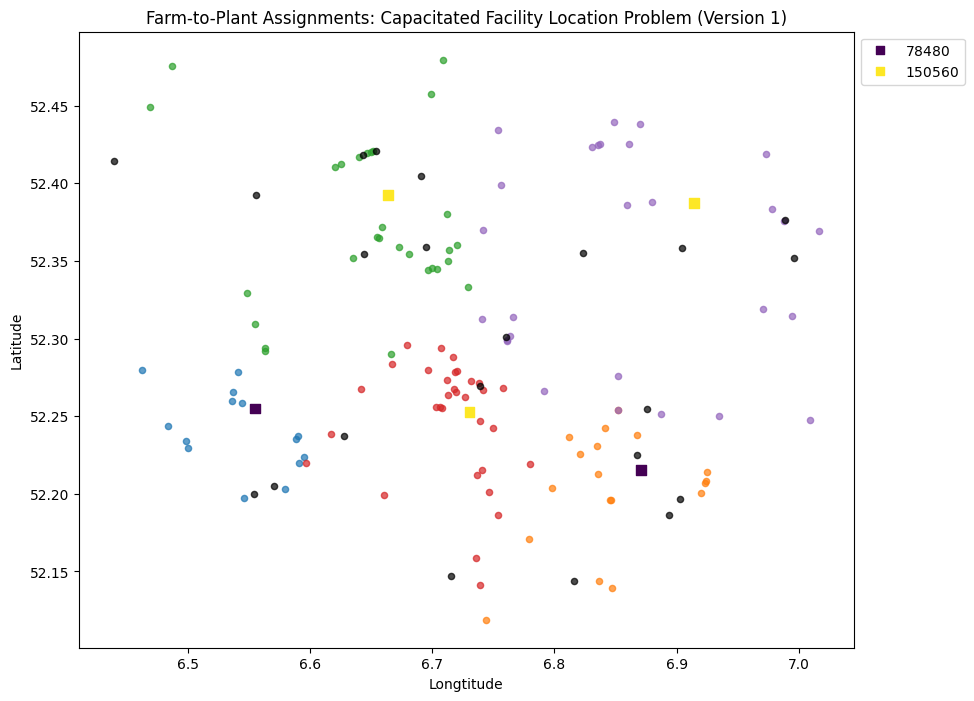

In [460]:
# Visualize the results
plt.figure(figsize=(10, 8))

for j in Plant:
    assigned = assigned_farms[j]
    plt.scatter([farm.loc[i, 'x'] for i in assigned], [farm.loc[i, 'y'] for i in assigned], label=f"Plant {j}", marker='o', s=20, alpha=0.7)
    # plt.scatter([potential_digester_location.iloc[j, "x"] for j in Plant], [potential_digester_location[j, "y"] for j in Plant], color='red', label="Plant Locations", marker='s', s=100)

for left_out in not_in_any_solution:
    plt.scatter(farm.loc[left_out, 'x'], farm.loc[left_out, 'y'], marker='o', s=20, c='Black', alpha=0.7)

scatter = plt.scatter(potential_digester_location['x'], potential_digester_location['y'], c=potential_digester_location['capacity'], label="Plant Locations", marker='s', s=50)
# Add labels based on 'Label' column
# for i, row in potential_digester_location.iterrows():
#     plt.annotate(row['capacity'], (row['x'], row['y']), textcoords="offset points", xytext=(0, 10), ha='center')

# Add labels and legend
plt.xlabel("Longtitude")
plt.ylabel("Latitude")
plt.title("Farm-to-Plant Assignments: Capacitated Facility Location Problem (Version 1)")
# plt.legend()
legend = plt.legend(*scatter.legend_elements(), loc='upper left', bbox_to_anchor=(1.0, 1.0))

# # Create a dictionary to map unique values to custom legend labels
# custom_labels = {'A': 'Category 1', 'B': 'Category 2', 'C': 'Category 3'}

# # Replace unique values with custom labels for the legend
# legend_labels = [custom_labels[label] for label in df['Label'].unique()]

# # Create the legend with custom labels
# legend = plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.savefig(r"./cflp_v1.png", dpi=300)

plt.show()

In [449]:
# Print Optimal
print("Total Cost = ", value(prob.objective))

TypeError: 'dict' object is not callable